# **Exploring Deep Learning to Develop Automatic Essay Scoring Models**
--------------------------------------------------------------------------------
## **Purpose of this project**

### Nowadays, students are studing on different online learning platforms. These platforms also provide assessments to show learners' progress. Multiple-choice questions are easy to be grade because there are correct answers. However, open-ended questions or essays are harder to grade. Peer review can be designed as an activity. When human graders are involved, they need to spend a large amout of time first reading the responses and then giving the score. Many education companies are trying to develop automatic essay scoring models, but encounter some problems in model development or implementation. Fortunately, we now have deep learning models and pre-trained large language models. This project will try to develop an automatic essay scoring model through deep learning.
--------------------------------------------------------------------------------
## **Goal of this project**

### The aim of this project is to use different deep learning models and a pre-trained large language model to develop an automatic essay scoring model. This is supervised multi-classification problem because the labels are provided and the labels are 1, 2, 3, 4, 5, 6. In the project, I will use a simple deep learning model (a multilayer perceptron), three sequential neural networks (bi-RNN, bi-LSTM, bi-GRU), and a pre-trained large language model (DeBERTa-V3-Base), and then compare their performance.
--------------------------------------------------------------------------------
## **Dataset**

### The data is from https://www.kaggle.com/competitions/learning-agency-lab-automated-essay-scoring-2/data. The competition has been closed. I selected the training data and just used the training data to develop different models. This dataset consists of 17307 observations and 3 variables (*essay_id*, *full_text*, and *score*). The variable of "full_text" is about students' essays and score is about their essay scores.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/train_automatic_essay_scoring.csv'
df = pd.read_csv(file_path)

print(df.head())
print(df.shape)
print(df.columns)


  essay_id                                          full_text  score
0  000d118  Many people have car where they live. The thin...      3
1  000fe60  I am a scientist at NASA that is discussing th...      3
2  001ab80  People always wish they had the same technolog...      4
3  001bdc0  We all heard about Venus, the planet without a...      4
4  002ba53  Dear, State Senator\n\nThis is a letter to arg...      3
(17307, 3)
Index(['essay_id', 'full_text', 'score'], dtype='object')


## **Exploratory data analysis**
### I first checked whether there were missing values in the text and score columns. No missing values. Then, I used histogram to visualize the score variable. We could see there was huge imbalance of data in this dataset which could post a big challenge to the model performance. There are over 6000 essays with a score of 3, over 4000 essays with a score of 2, around 4000 essays with a score of 4. There are just over 1000 essays each for score 1 and 5. The highest score, 6, is lowest, with around 1000 essays. My hypothesis is that the model would achieve a better performance in scores like 2, 3, 4 but have a low performance in score 6. Or possibly, the model could not predict successfully in essays with score 6.

### Here I would like to add two examples to show the essay text and its corresponding score.

### **An essay with a score of 3**

*  Score 3 "I am a scientist at NASA that is discussing the "face" on mars. I will be explaining how the "face" is a land form. By sharing my information about this isue i will tell you just that.

   First off, how could it be a martions drawing. There is no plant life on mars as of rite now that we know of, which means so far as we know it is not possible for any type of life. That explains how it could not be made by martians. Also why and how would a martion build a face so big. It just does not make any since that a martian did this.

   Next, why it is a landform. There are many landforms that are weird here in America, and there is also landforms all around the whole Earth. Many of them look like something we can relate to like a snake a turtle a human... So if there are landforms on earth dont you think landforms are on mars to? Of course! why not? It's just unique that the landform on Mars looks like a human face. Also if there was martians and they were trying to get our attention dont you think we would have saw one by now?

   Finaly, why you should listen to me. You should listen to me because i am a member of NASA and i've been dealing with all of this stuff that were talking about and people who say martians did this have no relation with NASA and have never worked with anything to relate to this landform. One last thing is that everyone working at NASA says the same thing i say, that the "face" is just a landform.

   To sum all this up the "face" on mars is a landform but others would like to beleive it's a martian sculpture. Which every one that works at NASA says it's a landform and they are all the ones working on the planet and taking pictures."

### **Another essay with a score of 6**

*   Score 6: Sometimes." (Plumer Paragraph 10) What the author is explaining is that during the presidential election, once you vote on your selection for the next president and you give your vote to the state electors you never know if they might change their mind or get scared and choose the incorrect candidate. For example, you choose on Barack Obama for president and you give your vote to the state electors and when it's time to vote... they decide to switch and choose HILARY CLINTON! Many of the citizens who voted for Barack Obama are now outraged by the thought of their state electors doing such a thing. If we had elections by popular vote we would be able to choose whom we specifically want for our President and there wouldn't be so much tension between people   

    Furthermore, the article "The indefensible electoral college: Why even the best-laid defenses of the system ae wrong" Bradford explains "Back in 1960, Segregationists in the Louisinna legislaure nearly succeeded in replacing the Democratic electors with new electors whoo would oppose John F. Kennedy." This quote from the article is saying that the electors could easily manipulate you and change their votes in order to get what they want, forgetting about all the other votes of the people back home waiting for the news that their selection has won the presidency.The elecoral college completely demolishes the purpose of the people's vote.

    Additionally, electoral colleges should be abolished because not everyone feels as strongly about it as they did hundreds of years ago when the process first came about. What had started out as a good idea has slowly turned into a unpredictable disaster. From time to time, People would be let down when they find out thatÂ  the candidate they had chosen didn't win the election, Why? because their state electors decided that it was okay for them to simply go against everyone else and be selfish by choosing their own candidate for presidency.

    Bradford proves this by explaining "...'faithless' electors have occasionally refused to vote for their party's candidate and cast a deciding vote for whomever they please..." (Plumer Paragraph 11) On multiple occasions voters have done exactly that, choosing someone completely different than whom they were supposed to. Many members of the party get angry with such childish behavior because it's selfish, uncalled for, and just disrespectful to go about ignoring the one major duty they had to cast a vote for their selected candidate. The article "In defense of the electoral college: Five reasons to keep our despised method of choosing the president" Richard A. Posner exclaims "The electoral college is widely regarded as a anachronism, a non-democratic method of selecting a president that ought to be [overruled] by declaring the candidate who recieves the most popular votes the winner." (Posner Paragraph 15) What the author is explaining is that the electoral college is an old custom and it's time that it was changed to something new like the election by popular vote.

    Time has changed, an so has the political veiws. The election by popular vote is a better opportunity because the state's people get to vote on exactly who they want without any major risks to deal with later on. Also, the election by popular vote is a simple and easier way of electing president.

    On the other hand, there are very few reasons that are pointing towards the electoral college being a good idea. For example, The electoral college has a even number of votes which make it easier to have a more predictable outcome of who might win the election. Although, not everyone might get the candidate that they had hoped for originally. The electoral college also comes along with the "Winner-take-all" method in which the awarding electoral votes induces the candidates running for the presidency. However, this is only based on the candidate that has the most popular votes. There are various reasons to consider the electoral college but many of them are followed by an overload of reasons NOT to keep the electoral college in use.

    Lastly, the election by popular vote should be used instead of the electoral college. The electoral college comes along with many complications and difficulties unlike the election by popular vote it has a simple and easier way of choosing who you want in the next presidency. Many people feel that you should change over to the election by popular vote to benefit all of the state's people so that they can have a more acurrate estimation of who theyÂ  might have as their new president.

    According to Bradford, the electoral college is "...Unfair, outdated, and irrational." (Plumer paragraph 14) It's about time we got rid of it and changed the way we elected our new president.

### These essays are discussing different topics. The essay with a score of 6 obviously had a better argumentation, language organization and sophisticated thinking.

## **Feature Engineering**
### I engineered six basic variables to represent the quality of essays: text_length, word_count, sentence_count, spelling_errors, readability_score (i.e., whether the text is easy to read and understand), and grade_level (i.e., which grade is the text suitable for). I then created a correlation analysis and remove readability_score and grade_level because of low correlation with the score.

In [ ]:
df[['full_text', 'score']].isna().sum()

,0
full_text,0
score,0


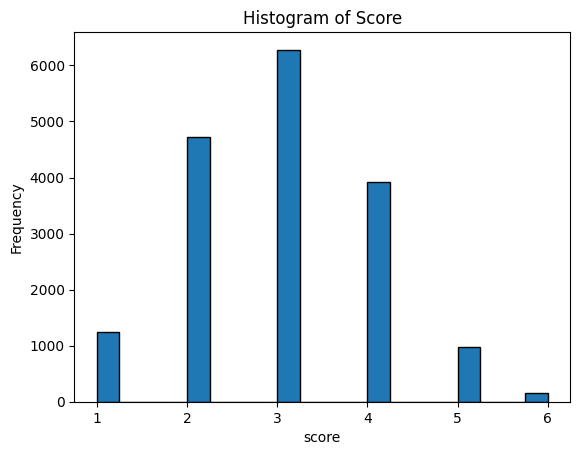

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['score'], bins=20, edgecolor='black')
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Histogram of Score')
plt.show()

In [ ]:
!pip install pyspellchecker    # create a new variable counting the number of spelling errors in the essay

from spellchecker import SpellChecker
spell = SpellChecker()

def count_spelling_errors(text):
    words = text.lower().split()
    misspelled = spell.unknown(words)
    return len(misspelled)

df['spelling_errors'] = df['full_text'].apply(count_spelling_errors)
print(df[['full_text', 'spelling_errors']].head())

                                           full_text  spelling_errors
0  Many people have car where they live. The thin...               50
1  I am a scientist at NASA that is discussing th...               32
2  People always wish they had the same technolog...               43
3  We all heard about Venus, the planet without a...               44
4  Dear, State Senator\n\nThis is a letter to arg...               40


In [ ]:
import re     ## create a clean version of text but keep punctuation and grammar

def basic_clean(text):
    if pd.isna(text):
        return ""
    # normalize whitespace
    text = text.replace('\r', ' ').replace('\n', ' ')
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['text_clean'] = df['full_text'].apply(basic_clean)

In [ ]:
def normalize_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    return text

df['text_norm'] = df['text_clean'].apply(normalize_text)

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import sent_tokenize, word_tokenize


def get_sentences(text):
    return sent_tokenize(text)

def get_words(text):
    return word_tokenize(text)

df['sentences'] = df['text_clean'].apply(get_sentences)
df['words']     = df['text_norm'].apply(get_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df['text_length_clean']    = df['text_clean'].str.len()
df['word_count_clean']     = df['words'].apply(len)
df['sentence_count_clean'] = df['sentences'].apply(len).replace(0, 1)

In [ ]:
!pip install textstat
import textstat

df['readability_score'] = df['text_clean'].apply(textstat.flesch_reading_ease)
df['grade_level']       = df['text_clean'].apply(textstat.flesch_kincaid_grade)

                      text_length_clean  word_count_clean  \
text_length_clean              1.000000          0.991587   
word_count_clean               0.991587          1.000000   
sentence_count_clean           0.778012          0.809110   
spelling_errors                0.837928          0.851428   
readability_score             -0.167268         -0.102378   
grade_level                    0.081592          0.045746   
score                          0.704351          0.695801   

                      sentence_count_clean  spelling_errors  \
text_length_clean                 0.778012         0.837928   
word_count_clean                  0.809110         0.851428   
sentence_count_clean              1.000000         0.771955   
spelling_errors                   0.771955         1.000000   
readability_score                 0.206750        -0.043486   
grade_level                      -0.270935        -0.052864   
score                             0.583232         0.573396   

      

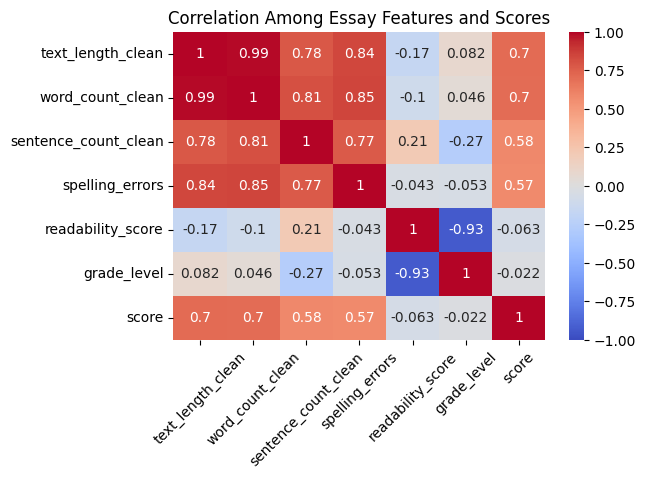

In [ ]:
import seaborn as sns
corr = df[['text_length_clean', 'word_count_clean', 'sentence_count_clean', 'spelling_errors', 'readability_score', 'grade_level', 'score']].corr()
print(corr)


plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Among Essay Features and Scores")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

## Model architecture


*   I first used the four engineered variables to build a 3-layer multilayer perceptron model to predict the final score. I splitted the data 80% for training, 10% for validation, and 10% for testing. For this model, I chose ReLu activation and 0.3 for dropout. The first hidden layer had 64 neurons, the second hidden layer had 32 neurons, and the third hidden layer had 16 neurons. I selected cross entropy loss, adam optimizer and 50 epochs. Here I actually did some hyperparameter tuning, trying different learning rates and different epochs. I chose this model because I engineered four variables and attempted to use this model as the baseline model.

*   Then, I built a sequential neural network pipeline (bi_RNN, bi_LSTM, bi_GRU). I chose these models because these essays are in long sequences and these models can better capture the temporal flow of information. I directly chose bidirectional because I think essay meaning is often influenced by both previous and upcoming context, and reading sequences in both forward and backward directions can help the model better understand relationships across the entire text. Before building models, I first created a word embedding with all the vocabularies in the text and gave them index. I used padding for those less than 300 words and unknown words. I implemented a unified recurrent model framework, RNNFamilyClassifier, which supports RNN, LSTM, and GRU architectures within a single pipeline. The model consists of an embedding layer, one recurrent layers (unidirectional or bidirectional), and a fully connected classification layer. Depending on the rnn_type parameter, the model dynamically initializes an RNN, LSTM, or GRU cell. Bidirectionality and depth are configurable, allowing the network to capture contextual information from both previous and upcoming tokens. The final prediction is obtained by concatenating the last forward and backward hidden states (if bidirectional) and passing them through a linear layer for classification.

*   I finally used "microsoft/deberta-v3-base" as the primary model for fine-tuning, leveraging its pretrained language representations for sequence classification.

In [ ]:
# build a simple neural nework as baseline model
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split

features = [
    'text_length_clean',
    'word_count_clean',
    'sentence_count_clean',
    'spelling_errors'
]

X = df[features].values.astype(np.float32)

le = LabelEncoder()
y = le.fit_transform(df['score'].values)
num_classes = len(le.classes_)
print("Classes:", le.classes_)

# First split: hold out 20% as test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# so final proportions ~80% train, 10% val, 10% test
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp
)

Classes: [1 2 3 4 5 6]


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_val   = torch.tensor(X_val,   dtype=torch.float32)
X_test  = torch.tensor(X_test,  dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.long)
y_val   = torch.tensor(y_val,   dtype=torch.long)
y_test  = torch.tensor(y_test,  dtype=torch.long)

batch_size = 64

train_dataset = TensorDataset(X_train, y_train)
val_dataset   = TensorDataset(X_val,   y_val)
test_dataset  = TensorDataset(X_test,  y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)

In [ ]:
class ThreeLayerMLP(nn.Module):
    def __init__(self, input_dim, hidden1=64, hidden2=32, hidden3=16, num_classes=10):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden1),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(hidden2, hidden3),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(hidden3, num_classes)   # final classification layer
        )

    def forward(self, x):
        return self.net(x)

In [ ]:
input_dim = X_train.shape[1]
num_classes = len(le.classes_)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = ThreeLayerMLP(input_dim=input_dim,
                      hidden1=64, hidden2=32, hidden3=16,
                      num_classes=num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

Using device: cuda


In [ ]:
train_losses = []
train_accs = []
val_losses = []
val_accs = []

def evaluate(model, data_loader):
    model.eval()
    correct, total, running_loss = 0, 0, 0.0
    with torch.no_grad():
        for xb, yb in data_loader:
            xb, yb = xb.to(device), yb.to(device)
            xb = xb.float()
            logits = model(xb)
            loss = criterion(logits, yb)
            running_loss += loss.item() * xb.size(0)
            preds = logits.argmax(dim=1)
            correct += (preds == yb).sum().item()
            total += yb.size(0)
    avg_loss = running_loss / total
    acc = correct / total
    return avg_loss, acc

num_epochs = 50
best_val_acc = 0.0
best_state_dict = None

for epoch in range(1, num_epochs + 1):
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        xb = xb.float()
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * xb.size(0)
        preds = logits.argmax(dim=1)
        train_correct += (preds == yb).sum().item()
        train_total += yb.size(0)

    avg_train_loss = train_loss / train_total
    train_acc = train_correct / train_total

    val_loss, val_acc = evaluate(model, val_loader)

    train_losses.append(avg_train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)


    # Save best model based on validation accuracy
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_state_dict = model.state_dict()

    print(
        f"Epoch {epoch:02d} | "
        f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.3f} | "
        f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.3f}"
    )

# Load best validation model
if best_state_dict is not None:
    model.load_state_dict(best_state_dict)
    print(f"\nLoaded best model with val acc = {best_val_acc:.3f}")

Epoch 01 | Train Loss: 10.4914, Train Acc: 0.244 | Val Loss: 1.6456, Val Acc: 0.325
Epoch 02 | Train Loss: 1.8517, Train Acc: 0.289 | Val Loss: 1.5756, Val Acc: 0.373
Epoch 03 | Train Loss: 1.6820, Train Acc: 0.293 | Val Loss: 1.5488, Val Acc: 0.357
Epoch 04 | Train Loss: 1.5935, Train Acc: 0.307 | Val Loss: 1.5228, Val Acc: 0.396
Epoch 05 | Train Loss: 1.5486, Train Acc: 0.310 | Val Loss: 1.4919, Val Acc: 0.391
Epoch 06 | Train Loss: 1.5170, Train Acc: 0.330 | Val Loss: 1.4723, Val Acc: 0.363
Epoch 07 | Train Loss: 1.4982, Train Acc: 0.363 | Val Loss: 1.4697, Val Acc: 0.363
Epoch 08 | Train Loss: 1.4898, Train Acc: 0.364 | Val Loss: 1.4661, Val Acc: 0.363
Epoch 09 | Train Loss: 1.4781, Train Acc: 0.365 | Val Loss: 1.4538, Val Acc: 0.363
Epoch 10 | Train Loss: 1.4728, Train Acc: 0.365 | Val Loss: 1.4465, Val Acc: 0.363
Epoch 11 | Train Loss: 1.4603, Train Acc: 0.365 | Val Loss: 1.4392, Val Acc: 0.363
Epoch 12 | Train Loss: 1.4628, Train Acc: 0.366 | Val Loss: 1.4369, Val Acc: 0.363
Epo

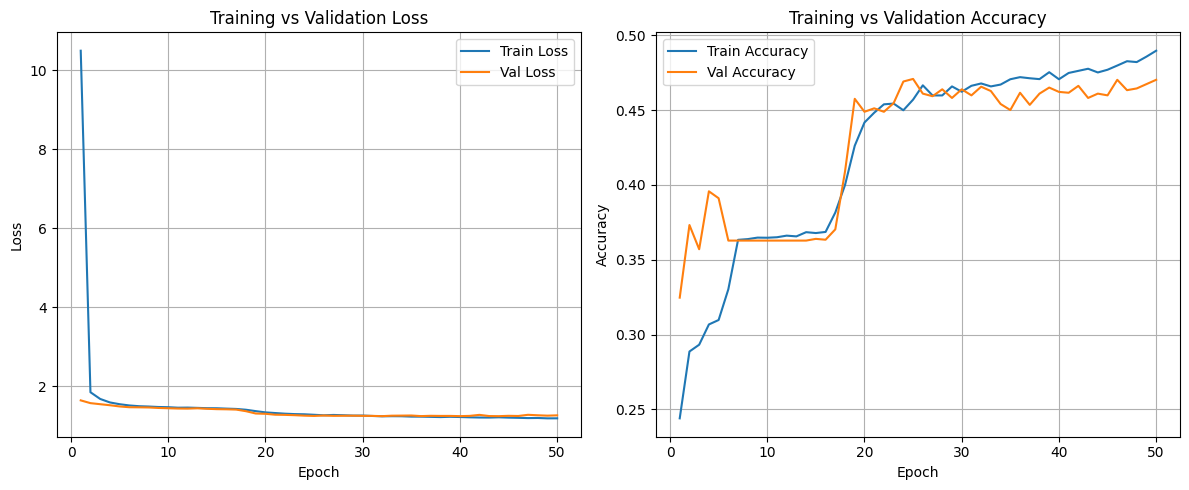

In [ ]:
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label="Train Loss")
plt.plot(epochs, val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accs, label="Train Accuracy")
plt.plot(epochs, val_accs, label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = evaluate(model, test_loader)
print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.3f}")

Test Loss: 1.2615, Test Acc: 0.458


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# gather predictions
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        xb = xb.float()
        logits = model(xb)
        preds = logits.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

In [ ]:
# Convert numeric labels to strings for printing
labels = le.classes_
label_names = [str(x) for x in labels]   # <-- important fix

print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=label_names))

# Confusion matrix (numbers)
cm = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix:")
print(cm)


Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       251
           2       0.64      0.50      0.56       945
           3       0.41      0.88      0.56      1256
           4       0.40      0.02      0.03       785
           5       0.00      0.00      0.00       194
           6       0.00      0.00      0.00        31

    accuracy                           0.46      3462
   macro avg       0.24      0.23      0.19      3462
weighted avg       0.41      0.46      0.36      3462


Confusion Matrix:
[[   0  122  128    1    0    0]
 [   0  470  470    5    0    0]
 [   0  144 1103    9    0    0]
 [   0    2  771   12    0    0]
 [   0    0  191    3    0    0]
 [   0    0   31    0    0    0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


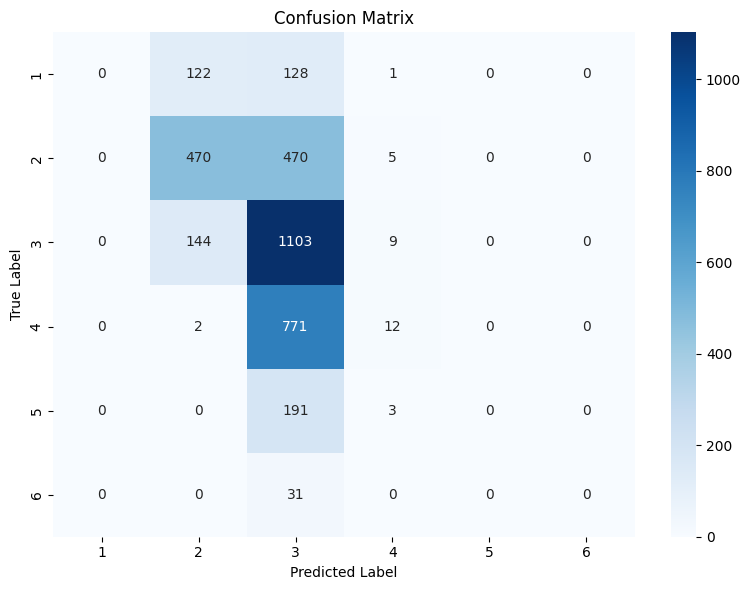

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [ ]:
import re
from collections import Counter

# 1) Simple tokenizer
def tokenize(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z0-9\s']", " ", text)
    return text.split()

texts = df["full_text"].astype(str).tolist()
tokenized_texts = [tokenize(t) for t in texts]

# 2) Build vocab with min frequency
min_freq = 5
counter = Counter(word for doc in tokenized_texts for word in doc)

PAD_TOKEN = "<pad>"
UNK_TOKEN = "<unk>"

vocab = {
    PAD_TOKEN: 0,
    UNK_TOKEN: 1,
}
for word, freq in counter.items():
    if freq >= min_freq:
        vocab[word] = len(vocab)

vocab_size = len(vocab)
pad_id = vocab[PAD_TOKEN]
unk_id = vocab[UNK_TOKEN]

print("Vocab size:", vocab_size)

Vocab size: 14333


In [ ]:
MAX_LEN = 300  # you can adjust

def encode(tokens):
    ids = [vocab.get(tok, unk_id) for tok in tokens]
    ids = ids[:MAX_LEN]
    ids += [pad_id] * (MAX_LEN - len(ids))
    return ids

encoded_sequences = [encode(toks) for toks in tokenized_texts]
encoded_sequences = np.array(encoded_sequences, dtype=np.int64)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df["score"].values)
num_classes = len(le.classes_)
print("Classes:", le.classes_)

X = encoded_sequences

# 80% train, 10% val, 10% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

Classes: [1 2 3 4 5 6]
Train: (12114, 300) Val: (1731, 300) Test: (3462, 300)


In [ ]:
from torch.utils.data import Dataset, DataLoader
class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.long)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return self.X.size(0)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = TextDataset(X_train, y_train)
val_dataset   = TextDataset(X_val,   y_val)
test_dataset  = TextDataset(X_test,  y_test)

batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)

In [ ]:
class RNNFamilyClassifier(nn.Module):
    def __init__(
        self,
        vocab_size,
        embed_dim,
        hidden_dim,
        num_classes,
        pad_id,
        rnn_type="rnn",
        num_layers=1,
        bidirectional=False,
        dropout=0.3,
    ):
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_id)

        rnn_cls = {
            "rnn": nn.RNN,
            "lstm": nn.LSTM,
            "gru": nn.GRU
        }[rnn_type]

        self.rnn_type = rnn_type
        self.bidirectional = bidirectional
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.num_directions = 2 if bidirectional else 1

        self.rnn = rnn_cls(
            input_size=embed_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=bidirectional,
            dropout=dropout if num_layers > 1 else 0.0,
        )

        factor = 2 if bidirectional else 1
        self.fc = nn.Linear(hidden_dim * factor, num_classes)

    def forward(self, x):
        emb = self.embedding(x)
        out, hidden = self.rnn(emb)

        if self.rnn_type == "lstm":
            h, c = hidden
        else:
            h = hidden


        h = h.view(self.num_layers, self.num_directions, h.size(1), self.hidden_dim)


        if self.bidirectional:
            last_hidden = torch.cat(
                (h[-1, 0], h[-1, 1]), dim=1
            )
        else:
            last_hidden = h[-1, 0]

        logits = self.fc(last_hidden)
        return logits

In [ ]:
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def evaluate(model, loader):
    model.eval()
    total_loss, total_correct, total_samples = 0.0, 0, 0
    with torch.no_grad():
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            loss = criterion(logits, yb)
            total_loss += loss.item() * xb.size(0)
            preds = logits.argmax(dim=1)
            total_correct += (preds == yb).sum().item()
            total_samples += yb.size(0)
    return total_loss/total_samples, total_correct/total_samples


def train_model(model, train_loader, val_loader, epochs=10, lr=1e-3):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    best_val_acc = 0.0
    best_state = None

    for epoch in range(1, epochs+1):
        model.train()
        total_loss, total_correct, total_samples = 0,0,0

        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)

            optimizer.zero_grad()
            logits = model(xb)
            loss = criterion(logits, yb)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 2.0)
            optimizer.step()

            total_loss += loss.item() * xb.size(0)
            preds = logits.argmax(dim=1)
            total_correct += (preds == yb).sum().item()
            total_samples += yb.size(0)

        train_loss = total_loss/total_samples
        train_acc  = total_correct/total_samples
        val_loss, val_acc = evaluate(model, val_loader)

        print(f"Epoch {epoch:02d} | Train Acc: {train_acc:.3f} | Val Acc: {val_acc:.3f}")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_state = {k:v.cpu() for k,v in model.state_dict().items()}

    if best_state is not None:
        model.load_state_dict(best_state)
        print(f"\nLoaded Best Model — Val Acc = {best_val_acc:.3f}")

    return model

In [ ]:
embed_dim = 200
hidden_dim = 128
num_layers = 1
bidirectional = True

# RNN
rnn_model = RNNFamilyClassifier(
    vocab_size=vocab_size,
    embed_dim=embed_dim,
    hidden_dim=hidden_dim,
    num_classes=num_classes,
    pad_id=pad_id,
    rnn_type="rnn",
    num_layers=num_layers,
    bidirectional=bidirectional,
)
print("\nTraining RNN...")
rnn_model = train_model(rnn_model, train_loader, val_loader, epochs=20, lr=1e-3)
rnn_test_loss, rnn_test_acc = evaluate(rnn_model, test_loader)
print(f"RNN Test Loss: {rnn_test_loss:.4f}, Test Acc: {rnn_test_acc:.3f}")

# LSTM
lstm_model = RNNFamilyClassifier(
    vocab_size=vocab_size,
    embed_dim=embed_dim,
    hidden_dim=hidden_dim,
    num_classes=num_classes,
    pad_id=pad_id,
    rnn_type="lstm",
    num_layers=num_layers,
    bidirectional=bidirectional,
)
print("\nTraining LSTM...")
lstm_model = train_model(lstm_model, train_loader, val_loader, epochs=20, lr=1e-3)
lstm_test_loss, lstm_test_acc = evaluate(lstm_model, test_loader)
print(f"LSTM Test Loss: {lstm_test_loss:.4f}, Test Acc: {lstm_test_acc:.3f}")

# GRU
gru_model = RNNFamilyClassifier(
    vocab_size=vocab_size,
    embed_dim=embed_dim,
    hidden_dim=hidden_dim,
    num_classes=num_classes,
    pad_id=pad_id,
    rnn_type="gru",
    num_layers=num_layers,
    bidirectional=bidirectional,
)
print("\nTraining GRU...")
gru_model = train_model(gru_model, train_loader, val_loader, epochs=20, lr=1e-3)
gru_test_loss, gru_test_acc = evaluate(gru_model, test_loader)
print(f"GRU Test Loss: {gru_test_loss:.4f}, Test Acc: {gru_test_acc:.3f}")


Training RNN...
Epoch 01 | Train Acc: 0.452 | Val Acc: 0.462
Epoch 02 | Train Acc: 0.507 | Val Acc: 0.470
Epoch 03 | Train Acc: 0.540 | Val Acc: 0.447
Epoch 04 | Train Acc: 0.584 | Val Acc: 0.400
Epoch 05 | Train Acc: 0.634 | Val Acc: 0.464
Epoch 06 | Train Acc: 0.678 | Val Acc: 0.449
Epoch 07 | Train Acc: 0.730 | Val Acc: 0.438
Epoch 08 | Train Acc: 0.782 | Val Acc: 0.443
Epoch 09 | Train Acc: 0.830 | Val Acc: 0.440
Epoch 10 | Train Acc: 0.865 | Val Acc: 0.424
Epoch 11 | Train Acc: 0.887 | Val Acc: 0.423
Epoch 12 | Train Acc: 0.919 | Val Acc: 0.421
Epoch 13 | Train Acc: 0.932 | Val Acc: 0.411
Epoch 14 | Train Acc: 0.950 | Val Acc: 0.422
Epoch 15 | Train Acc: 0.957 | Val Acc: 0.413
Epoch 16 | Train Acc: 0.968 | Val Acc: 0.413
Epoch 17 | Train Acc: 0.930 | Val Acc: 0.428
Epoch 18 | Train Acc: 0.965 | Val Acc: 0.411
Epoch 19 | Train Acc: 0.977 | Val Acc: 0.408
Epoch 20 | Train Acc: 0.985 | Val Acc: 0.411

Loaded Best Model — Val Acc = 0.470
RNN Test Loss: 1.2422, Test Acc: 0.458

Traini

In [ ]:
def get_predictions(model, loader):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            logits = model(xb)
            pred = logits.argmax(1)
            preds.extend(pred.cpu().numpy())
            labels.extend(yb.cpu().numpy())
    return np.array(preds), np.array(labels)

# Collect predictions for all 3 models
rnn_preds, rnn_labels   = get_predictions(rnn_model,  test_loader)
lstm_preds, lstm_labels = get_predictions(lstm_model, test_loader)
gru_preds, gru_labels   = get_predictions(gru_model,  test_loader)

# Build confusion matrices
cm_rnn  = confusion_matrix(rnn_labels,  rnn_preds)
cm_lstm = confusion_matrix(lstm_labels, lstm_preds)
cm_gru  = confusion_matrix(gru_labels,  gru_preds)

label_names = [str(x) for x in le.classes_]

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
def show_table(cm, name):
    print(f"\n===== {name} Confusion Table =====")
    print(cm)

show_table(cm_rnn,  "RNN")
show_table(cm_lstm, "LSTM")
show_table(cm_gru,  "GRU")

print("===== RNN Classification Report =====")
print("Accuracy:", accuracy_score(rnn_labels, rnn_preds))
print(classification_report(rnn_labels, rnn_preds, target_names=label_names))

print("\n===== LSTM Classification Report =====")
print("Accuracy:", accuracy_score(lstm_labels, lstm_preds))
print(classification_report(lstm_labels, lstm_preds, target_names=label_names))

print("\n===== GRU Classification Report =====")
print("Accuracy:", accuracy_score(gru_labels, gru_preds))
print(classification_report(gru_labels, gru_preds, target_names=label_names))


===== RNN Confusion Table =====
[[ 20 152  66  12   1   0]
 [ 23 632 256  32   2   0]
 [ 12 322 784 130   8   0]
 [  1   7 622 150   5   0]
 [  1   2 143  48   0   0]
 [  1   0  18  11   1   0]]

===== LSTM Confusion Table =====
[[ 17 154  57  23   0   0]
 [ 15 556 289  82   3   0]
 [  5 199 709 337   6   0]
 [  0   8 325 439  13   0]
 [  0   2  65 119   8   0]
 [  0   0  11  18   2   0]]

===== GRU Confusion Table =====
[[ 49 148  41  13   0   0]
 [ 33 594 262  53   2   1]
 [ 11 226 649 359  11   0]
 [  3  15 277 457  31   2]
 [  0   3  34 139  16   2]
 [  0   0   7  21   2   1]]
===== RNN Classification Report =====
Accuracy: 0.4581166955517042
              precision    recall  f1-score   support

           1       0.34      0.08      0.13       251
           2       0.57      0.67      0.61       945
           3       0.42      0.62      0.50      1256
           4       0.39      0.19      0.26       785
           5       0.00      0.00      0.00       194
           6       

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [ ]:
df = df.dropna(subset=["full_text", "score"]).reset_index(drop=True)
df["score"] = df["score"].astype(int)

# Map scores 1–6 → 0–5 for the model
df["label"] = df["score"] - 1
df[["full_text", "score", "label"]].head()

,full_text,score,label
0,Many people have car where they live. The thin...,3,2
1,I am a scientist at NASA that is discussing th...,3,2
2,People always wish they had the same technolog...,4,3
3,"We all heard about Venus, the planet without a...",4,3
4,"Dear, State Senator\n\nThis is a letter to arg...",3,2


In [ ]:
from datasets import Dataset

dataset = Dataset.from_pandas(df[["full_text", "label"]])

temp = dataset.train_test_split(test_size=0.1, seed=42)
test_ds = temp["test"]
rest_ds = temp["train"]

splits = rest_ds.train_test_split(test_size=1/9, seed=42)
train_ds = splits["train"]
val_ds   = splits["test"]

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "microsoft/deberta-v3-base"

tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=6,   # <<< 6 classes: internal labels 0–5
    problem_type="single_label_classification"
)

/usr/local/lib/python3.12/dist-packages/transformers/convert_slow_tokenizer.py:566: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
MAX_LEN = 512

def tokenize_batch(batch):
    return tokenizer(
        batch["full_text"],
        truncation=True,
        padding="max_length",
        max_length=MAX_LEN,
    )

train_tok = train_ds.map(tokenize_batch, batched=True)
val_tok   = val_ds.map(tokenize_batch,   batched=True)
test_tok  = test_ds.map(tokenize_batch,  batched=True)

for ds in (train_tok, val_tok, test_tok):
    ds = ds.rename_column("label", "labels")
    ds.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

Map:   0%|          | 0/13845 [00:00<?, ? examples/s]

Map:   0%|          | 0/1731 [00:00<?, ? examples/s]

Map:   0%|          | 0/1731 [00:00<?, ? examples/s]

In [ ]:
from transformers import TrainingArguments, Trainer
import torch
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    preds = pred.predictions.argmax(-1)
    labels = pred.label_ids
    return {
        "accuracy": accuracy_score(labels, preds),
        "macro_f1": f1_score(labels, preds, average="macro"),
        "weighted_f1": f1_score(labels, preds, average="weighted"),
    }

training_args = TrainingArguments(
    output_dir="./deberta-essay",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=100,

    # OLD VERSION — REPLACEMENT SETTINGS
    eval_steps=500,      # evaluate every 500 steps
    save_steps=500,      # save every 500 steps
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tok,
    eval_dataset=val_tok,      # VALIDATION STILL WORKS!
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer.train()

/tmp/ipython-input-3645342441.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
100,1.396200
200,1.148400
300,1.061100
400,1.020800
500,1.052000
600,0.974500
700,0.976300
800,0.926600
900,0.995900
1000,0.975700


Step,Training Loss
100,1.396200
200,1.148400
300,1.061100
400,1.020800
500,1.052000
600,0.974500
700,0.976300
800,0.926600
900,0.995900
1000,0.975700


TrainOutput(global_step=5193, training_loss=0.818074398823104, metrics={'train_runtime': 5651.6016, 'train_samples_per_second': 7.349, 'train_steps_per_second': 0.919, 'total_flos': 1.092890615491584e+16, 'train_loss': 0.818074398823104, 'epoch': 3.0})

In [ ]:
pred_output = trainer.predict(test_tok)
raw_preds = pred_output.predictions

y_true = pred_output.label_ids
y_pred = raw_preds.argmax(axis=-1)

In [ ]:
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[ 55  59   9   1   0   0]
 [ 10 275 141  15   1   0]
 [  2  78 457 120  11   0]
 [  0   4  73 279  43   0]
 [  0   0   0  33  52   0]
 [  0   0   0   0  13   0]]
              precision    recall  f1-score   support

           0       0.82      0.44      0.58       124
           1       0.66      0.62      0.64       442
           2       0.67      0.68      0.68       668
           3       0.62      0.70      0.66       399
           4       0.43      0.61      0.51        85
           5       0.00      0.00      0.00        13

    accuracy                           0.65      1731
   macro avg       0.54      0.51      0.51      1731
weighted avg       0.65      0.65      0.64      1731



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


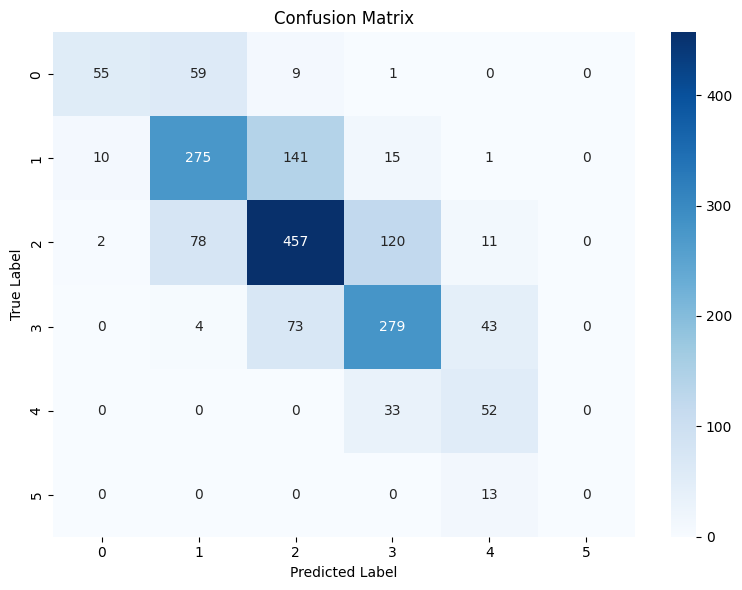

In [ ]:
cm = confusion_matrix(y_true, y_pred)

labels = sorted(list(set(y_true)))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

## **Model results and analysis**
### I fitted the models with some hyperparameter tuning, such as adding a new layer, changing the learning and increasing the number of epochs. Here is a summary of results:

| Model | Type | Overall ACC | Note |
|------|------|------------|--------|
| MLP | Feedforward | 0.46 | Did not predict score 1, 5, and 6 |
| Bi_RNN | Sequential | 0.46 | Performed worse in score 1; did not predict score 5 and 6 |
| Bi_LSTM | Sequential | 0.50 | Performed worse in score 1 and 5; did not predict score 6 |
| Bi_GRU | Sequential | 0.51 | Performed worse in score 1, 5, and 6 |
| DeBERTa-V3-Base | Transformer  |   0.65     |   Performed worse in score 5; did not predict score 6 |

### When I just used four engineered variables to predict the outcomes, the result was not good. The model almost could not predict any essays in score 1, 5, and 6. With sequential neural networks, the performance improved a little bit, but these models still struggled with essays with score 1, 5, and 6. The transformer DeBERTa-V3-Base improved the performance a lot. Now, it only struggled with essays with score 5, and 6. It actually had an average performance in score 5 but did not predict any essays in score 6. The main reason behind this is that there is a huge data imbalance. The number of essays in score 6 is pretty low. Even the transformer learned better and improve a lot, it still struggled with this.

--------------------------------------------------------------------------------

## **Learning and takeaways**

*   Transformers had a better performance than sequential neural network models and feedforward neural models considering it is better at capturing the contextual and temporal information.
*   If there is a huge data imbalance, it is hard to build a model with a good performance because it is hard for the model to capture information from unrepresented categories.
*   Although the final performance may not reach to a satisfactory score, it still shows a decent progress.

## **Ways to improve**

*   Using the transformer is the recommended choice. But some new features need to be engineered especially the unique features of score 6. For example, whether score 6 produced longer text; whether score 6 included more transition words to structure the text; whether score 6 presented a more persuasive style
*   Some data augmentation methods can be used. For example, consider using large language models to preduce responses in score 1, 5, and 6 to make the data more balanced. Still some unique features of essays of score 1, 5, and 6 should be distinguished first.






